<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

#### Cesar Chen Peralta Jr II / S10205582

### 1. [Data Loading](#part1)
### 2. [Develop the Image Classification Models](#part2)
### 4. [Evaluate the Developed Models using Testing Images](#part3)
### 4. [Use the best model to make prediction](#part4)

In [1]:
# Import the Required Packages
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.applications import VGG16

## Step 1: Data Loading<a id="part1"></a>

In [2]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
img_size = 150

base_IDG = ImageDataGenerator(rescale=1./255)

train = base_IDG.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=75,
    class_mode='categorical')

validation = base_IDG.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=50,
    class_mode='categorical')

test = base_IDG.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=50,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


## Step 2:  Develop the Image Classification Models<a id="part2"></a>

### Model #1

In [38]:
# Build Base Model 1
bmodel1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

bmodel1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 175232)            0         
                                                                 
 dense_12 (Dense)            (None, 32)                5607456   
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 5,608,682
Trainable params: 5,608,682
Non-trainable params: 0
____________________________________________

In [39]:
# Train Base Model 1
opt = optimizers.RMSprop(lr=0.001)
bmodel1.compile(loss='categorical_crossentropy',
                optimizer=opt,
               metrics=['acc'])

bmodel1_hist = bmodel1.fit(train,
                          steps_per_epoch=100,
                          epochs=20,
                          validation_data=validation,
                          validation_steps=40)

Epoch 1/20
100/100 [==============================] - 65s 644ms/step - loss: 2.7464 - acc: 0.1525 - val_loss: 2.2666 - val_acc: 0.1665
Epoch 2/20
100/100 [==============================] - 64s 638ms/step - loss: 2.1245 - acc: 0.2325 - val_loss: 2.1054 - val_acc: 0.2445
Epoch 3/20
100/100 [==============================] - 67s 674ms/step - loss: 1.9179 - acc: 0.3197 - val_loss: 1.9752 - val_acc: 0.3175
Epoch 4/20
100/100 [==============================] - 72s 721ms/step - loss: 1.6367 - acc: 0.4297 - val_loss: 2.0119 - val_acc: 0.3295
Epoch 5/20
100/100 [==============================] - 71s 711ms/step - loss: 1.3734 - acc: 0.5332 - val_loss: 1.9648 - val_acc: 0.3190
Epoch 6/20
100/100 [==============================] - 73s 725ms/step - loss: 1.1119 - acc: 0.6407 - val_loss: 2.2869 - val_acc: 0.3090
Epoch 7/20
100/100 [==============================] - 67s 668ms/step - loss: 0.8616 - acc: 0.7289 - val_loss: 2.5365 - val_acc: 0.2900
Epoch 8/20
100/100 [==============================] - 6

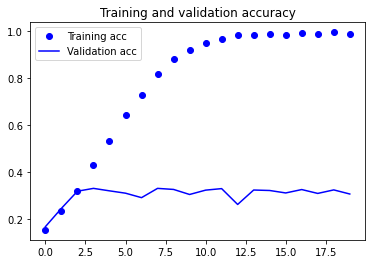

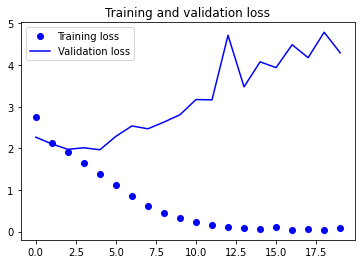

In [40]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = bmodel1_hist.history['acc']
val_acc = bmodel1_hist.history['val_acc']
loss = bmodel1_hist.history['loss']
val_loss = bmodel1_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
# Build Base Model 2
bmodel2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3, 3), activation='relu',
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

bmodel2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 41472)             0         
                                                                 
 dense_14 (Dense)            (None, 32)               

In [42]:
# Train Base Model 2
opt = optimizers.RMSprop(lr=0.001)
bmodel2.compile(loss='categorical_crossentropy',
                optimizer=opt,
               metrics=['acc'])

bmodel2_hist = bmodel2.fit(train,
                          steps_per_epoch=100,
                          epochs=20,
                          validation_data=validation,
                          validation_steps=40)

Epoch 1/20
100/100 [==============================] - 87s 867ms/step - loss: 2.2705 - acc: 0.1752 - val_loss: 2.1145 - val_acc: 0.2250
Epoch 2/20
100/100 [==============================] - 81s 806ms/step - loss: 1.9685 - acc: 0.3171 - val_loss: 1.9709 - val_acc: 0.3075
Epoch 3/20
100/100 [==============================] - 79s 790ms/step - loss: 1.7219 - acc: 0.4171 - val_loss: 1.9109 - val_acc: 0.3315
Epoch 4/20
100/100 [==============================] - 80s 796ms/step - loss: 1.4974 - acc: 0.4899 - val_loss: 2.0396 - val_acc: 0.3295
Epoch 5/20
100/100 [==============================] - 83s 830ms/step - loss: 1.2688 - acc: 0.5764 - val_loss: 2.0524 - val_acc: 0.3295
Epoch 6/20
100/100 [==============================] - 82s 818ms/step - loss: 1.0367 - acc: 0.6601 - val_loss: 2.1370 - val_acc: 0.3475
Epoch 7/20
100/100 [==============================] - 81s 813ms/step - loss: 0.8297 - acc: 0.7327 - val_loss: 2.2455 - val_acc: 0.3370
Epoch 8/20
100/100 [==============================] - 1

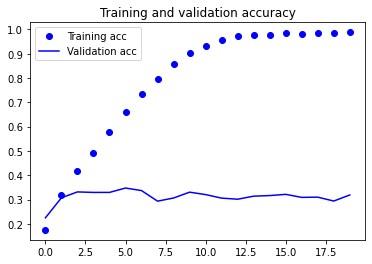

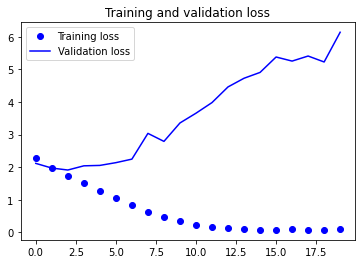

In [43]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = bmodel2_hist.history['acc']
val_acc = bmodel2_hist.history['val_acc']
loss = bmodel2_hist.history['loss']
val_loss = bmodel2_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
aug_IDG = ImageDataGenerator(rescale=1./255,
                            rotation_range=50,
                            width_shift_range=0.25,
                            height_shift_range=0.25,
                            shear_range=0.3,
                            brightness_range=[0.3,1.0],
                            zoom_range=0.25,
                            horizontal_flip=True)

aug_train = aug_IDG.flow_from_directory(train_dir,
                                       target_size=(img_size, img_size),
                                       batch_size=75,
                                       class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [47]:
# Build Base Model 3
bmodel3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3, 3), activation='relu',
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

bmodel3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 41472)             0         
                                                                 
 dense_18 (Dense)            (None, 32)               

In [48]:
# Train Base Model 3
opt = optimizers.RMSprop(lr=0.001)
bmodel3.compile(loss='categorical_crossentropy',
                optimizer=opt,
               metrics=['acc'])

bmodel3_hist = bmodel3.fit(aug_train,
                          steps_per_epoch=100,
                          epochs=40,
                          validation_data=validation,
                          validation_steps=40)

Epoch 1/40
100/100 [==============================] - 133s 1s/step - loss: 2.3235 - acc: 0.1411 - val_loss: 2.2584 - val_acc: 0.1655
Epoch 2/40
100/100 [==============================] - 130s 1s/step - loss: 2.2172 - acc: 0.1797 - val_loss: 2.1364 - val_acc: 0.2255
Epoch 3/40
100/100 [==============================] - 131s 1s/step - loss: 2.1523 - acc: 0.2163 - val_loss: 2.0811 - val_acc: 0.2415
Epoch 4/40
100/100 [==============================] - 130s 1s/step - loss: 2.0980 - acc: 0.2593 - val_loss: 2.0385 - val_acc: 0.3085
Epoch 5/40
100/100 [==============================] - 128s 1s/step - loss: 2.0454 - acc: 0.2752 - val_loss: 2.2726 - val_acc: 0.2455
Epoch 6/40
100/100 [==============================] - 124s 1s/step - loss: 2.0036 - acc: 0.3003 - val_loss: 2.2712 - val_acc: 0.2720
Epoch 7/40
100/100 [==============================] - 125s 1s/step - loss: 1.9603 - acc: 0.3187 - val_loss: 1.8824 - val_acc: 0.3670
Epoch 8/40
100/100 [==============================] - 126s 1s/step - 

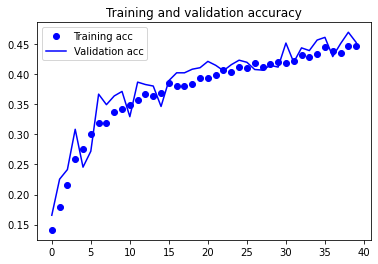

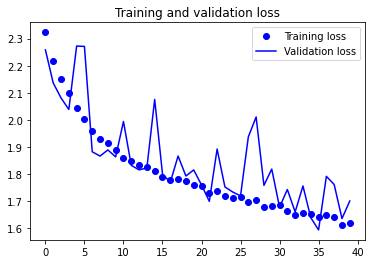

In [49]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = bmodel3_hist.history['acc']
val_acc = bmodel3_hist.history['val_acc']
loss = bmodel3_hist.history['loss']
val_loss = bmodel3_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
# Build Base Model 4
bmodel4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu',
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu',
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3, 3), activation='relu',
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

bmodel4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 128)    

In [54]:
# Train Base Model 4
opt = optimizers.RMSprop(lr=0.001)
bmodel4.compile(loss='categorical_crossentropy',
                optimizer=opt,
               metrics=['acc'])

bmodel4_hist = bmodel4.fit(aug_train,
                          steps_per_epoch=100,
                          epochs=40,
                          validation_data=validation,
                          validation_steps=40)

Epoch 1/40
100/100 [==============================] - 201s 2s/step - loss: 2.3555 - acc: 0.1523 - val_loss: 2.5311 - val_acc: 0.1730
Epoch 2/40
100/100 [==============================] - 192s 2s/step - loss: 2.1703 - acc: 0.2220 - val_loss: 1.9918 - val_acc: 0.3100
Epoch 3/40
100/100 [==============================] - 198s 2s/step - loss: 2.0602 - acc: 0.2719 - val_loss: 2.1451 - val_acc: 0.2430
Epoch 4/40
100/100 [==============================] - 177s 2s/step - loss: 1.9860 - acc: 0.3015 - val_loss: 2.0801 - val_acc: 0.2985
Epoch 5/40
100/100 [==============================] - 180s 2s/step - loss: 1.9333 - acc: 0.3265 - val_loss: 1.7393 - val_acc: 0.4145
Epoch 6/40
100/100 [==============================] - 177s 2s/step - loss: 1.8523 - acc: 0.3593 - val_loss: 1.6932 - val_acc: 0.4195
Epoch 7/40
100/100 [==============================] - 182s 2s/step - loss: 1.7709 - acc: 0.3932 - val_loss: 2.1604 - val_acc: 0.3310
Epoch 8/40
100/100 [==============================] - 182s 2s/step - 

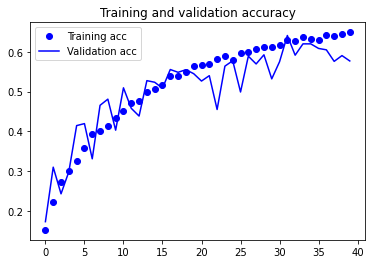

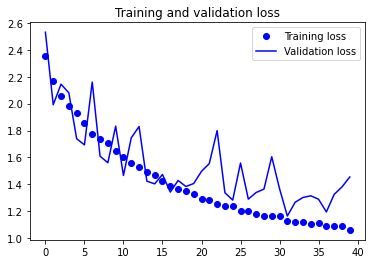

In [55]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = bmodel4_hist.history['acc']
val_acc = bmodel4_hist.history['val_acc']
loss = bmodel4_hist.history['loss']
val_loss = bmodel4_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
# Build Model 1.1
model11 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu',
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3, 3), activation='relu',
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512, (3, 3), activation='relu', 
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 17, 17, 256)    

In [57]:
# Train Model 1.1
opt = optimizers.RMSprop(lr=0.001)
model11.compile(loss='categorical_crossentropy',
                optimizer=opt,
               metrics=['acc'])

model11_hist = model11.fit(aug_train,
                          steps_per_epoch=100,
                          epochs=80,
                          validation_data=validation,
                          validation_steps=40)

Epoch 1/80
100/100 [==============================] - 401s 4s/step - loss: 2.4618 - acc: 0.1223 - val_loss: 2.3004 - val_acc: 0.1615
Epoch 2/80
100/100 [==============================] - 419s 4s/step - loss: 2.2384 - acc: 0.1876 - val_loss: 2.1767 - val_acc: 0.1815
Epoch 3/80
100/100 [==============================] - 445s 4s/step - loss: 2.1517 - acc: 0.2192 - val_loss: 2.0678 - val_acc: 0.2710
Epoch 4/80
100/100 [==============================] - 439s 4s/step - loss: 2.0706 - acc: 0.2652 - val_loss: 1.9861 - val_acc: 0.3020
Epoch 5/80
100/100 [==============================] - 408s 4s/step - loss: 2.0041 - acc: 0.2932 - val_loss: 1.8583 - val_acc: 0.3765
Epoch 6/80
100/100 [==============================] - 411s 4s/step - loss: 1.9497 - acc: 0.3188 - val_loss: 1.8100 - val_acc: 0.4050
Epoch 7/80
100/100 [==============================] - 405s 4s/step - loss: 1.8910 - acc: 0.3452 - val_loss: 1.7916 - val_acc: 0.4080
Epoch 8/80
100/100 [==============================] - 405s 4s/step - 

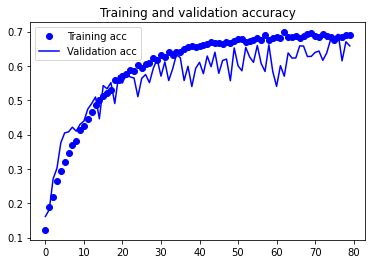

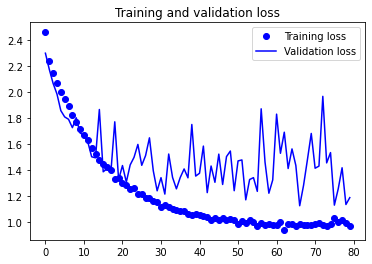

In [58]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = model11_hist.history['acc']
val_acc = model11_hist.history['val_acc']
loss = model11_hist.history['loss']
val_loss = model11_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
# Build Model 1.5
model15 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu', 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3, 3), activation='relu', 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512, (3, 3), activation='relu',
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dense(10, activation='softmax')
])

model15.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 256)     

In [12]:
# Train Model 1.5
opt = optimizers.RMSprop(lr=0.001)
model15.compile(loss='categorical_crossentropy',
                optimizer=opt,
               metrics=['acc'])

model15_hist = model15.fit(aug_train,
                          steps_per_epoch=100,
                          epochs=80,
                          validation_data=validation,
                          validation_steps=40)

Epoch 1/80
100/100 [==============================] - 399s 4s/step - loss: 2.4807 - acc: 0.1269 - val_loss: 2.2466 - val_acc: 0.1895
Epoch 2/80
100/100 [==============================] - 408s 4s/step - loss: 2.2236 - acc: 0.1872 - val_loss: 2.1291 - val_acc: 0.2475
Epoch 3/80
100/100 [==============================] - 409s 4s/step - loss: 2.1458 - acc: 0.2248 - val_loss: 2.0671 - val_acc: 0.2835
Epoch 4/80
100/100 [==============================] - 408s 4s/step - loss: 2.0784 - acc: 0.2611 - val_loss: 2.0303 - val_acc: 0.2895
Epoch 5/80
100/100 [==============================] - 407s 4s/step - loss: 2.0558 - acc: 0.2713 - val_loss: 2.1393 - val_acc: 0.2445
Epoch 6/80
100/100 [==============================] - 414s 4s/step - loss: 2.0004 - acc: 0.2973 - val_loss: 2.0114 - val_acc: 0.2955
Epoch 7/80
100/100 [==============================] - 443s 4s/step - loss: 1.9517 - acc: 0.3169 - val_loss: 1.7774 - val_acc: 0.4080
Epoch 8/80
100/100 [==============================] - 428s 4s/step - 

100/100 [==============================] - 399s 4s/step - loss: 0.9950 - acc: 0.7037 - val_loss: 1.4200 - val_acc: 0.6385
Epoch 63/80
100/100 [==============================] - 393s 4s/step - loss: 1.0131 - acc: 0.6948 - val_loss: 1.3278 - val_acc: 0.6560
Epoch 64/80
100/100 [==============================] - 398s 4s/step - loss: 0.9972 - acc: 0.7008 - val_loss: 1.1750 - val_acc: 0.6680
Epoch 65/80
100/100 [==============================] - 393s 4s/step - loss: 0.9927 - acc: 0.6987 - val_loss: 1.7021 - val_acc: 0.6080
Epoch 66/80
100/100 [==============================] - 396s 4s/step - loss: 0.9930 - acc: 0.6993 - val_loss: 1.2609 - val_acc: 0.6515
Epoch 67/80
100/100 [==============================] - 402s 4s/step - loss: 0.9703 - acc: 0.7029 - val_loss: 1.3458 - val_acc: 0.6360
Epoch 68/80
100/100 [==============================] - 401s 4s/step - loss: 0.9910 - acc: 0.7028 - val_loss: 1.2443 - val_acc: 0.6880
Epoch 69/80
100/100 [==============================] - 398s 4s/step - loss

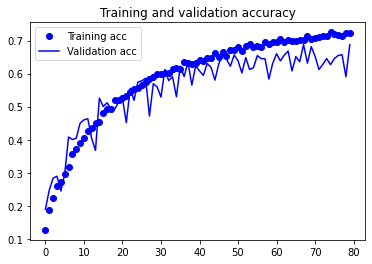

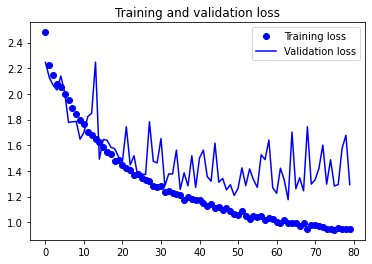

In [13]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = model15_hist.history['acc']
val_acc = model15_hist.history['val_acc']
loss = model15_hist.history['loss']
val_loss = model15_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
# Save the Model
model15.save('food_model_1.h5')

### Model #2

In [42]:
# Build the Model
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(img_size,img_size,3))
                  
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [43]:
model21 = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model21.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               4194816   
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 18,976,458
Trainable params: 18,976,458
Non-trainable params: 0
_________________________________________________________________


In [44]:
conv_base.trainable = False
model21.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               4194816   
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 18,976,458
Trainable params: 4,261,770
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
# Train the Model
opt = optimizers.RMSprop(lr=0.0001)
model21.compile(loss='categorical_crossentropy',
                optimizer=opt,
               metrics=['acc'])

model21_hist = model21.fit(aug_train,
                          steps_per_epoch=100,
                          epochs=30,
                          validation_data=validation,
                          validation_steps=40)

Epoch 1/30
100/100 [==============================] - 651s 7s/step - loss: 2.6891 - acc: 0.2667 - val_loss: 1.6512 - val_acc: 0.4215
Epoch 2/30
100/100 [==============================] - 682s 7s/step - loss: 1.7460 - acc: 0.4056 - val_loss: 1.4561 - val_acc: 0.5290
Epoch 3/30
100/100 [==============================] - 768s 8s/step - loss: 1.6179 - acc: 0.4553 - val_loss: 1.3683 - val_acc: 0.5370
Epoch 4/30
100/100 [==============================] - 744s 7s/step - loss: 1.5504 - acc: 0.4811 - val_loss: 1.3219 - val_acc: 0.5510
Epoch 5/30
100/100 [==============================] - 792s 8s/step - loss: 1.4979 - acc: 0.4959 - val_loss: 1.2291 - val_acc: 0.5890
Epoch 6/30
100/100 [==============================] - 756s 8s/step - loss: 1.4623 - acc: 0.5031 - val_loss: 1.2143 - val_acc: 0.5960
Epoch 7/30
100/100 [==============================] - 738s 7s/step - loss: 1.4391 - acc: 0.5157 - val_loss: 1.1925 - val_acc: 0.5935
Epoch 8/30
100/100 [==============================] - 691s 7s/step - 

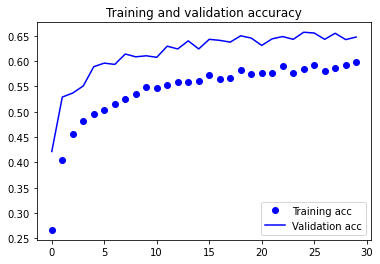

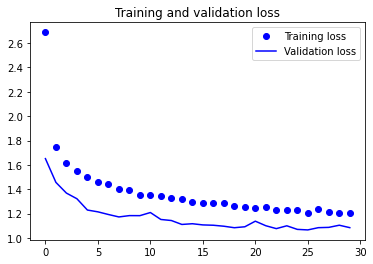

In [25]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = model21_hist.history['acc']
val_acc = model21_hist.history['val_acc']
loss = model21_hist.history['loss']
val_loss = model21_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
# Train the Model
opt = optimizers.RMSprop(lr=0.0001)
model21.compile(loss='categorical_crossentropy',
                optimizer=opt,
               metrics=['acc'])

model21_hist = model21.fit(aug_train,
                          steps_per_epoch=100,
                          epochs=80,
                          validation_data=validation,
                          validation_steps=40)

Epoch 1/80
100/100 [==============================] - 685s 7s/step - loss: 1.9155 - acc: 0.3247 - val_loss: 1.5283 - val_acc: 0.4705
Epoch 2/80
100/100 [==============================] - 751s 8s/step - loss: 1.6395 - acc: 0.4364 - val_loss: 1.3482 - val_acc: 0.5435
Epoch 3/80
100/100 [==============================] - 699s 7s/step - loss: 1.5325 - acc: 0.4775 - val_loss: 1.2806 - val_acc: 0.5645
Epoch 4/80
100/100 [==============================] - 756s 8s/step - loss: 1.4718 - acc: 0.4983 - val_loss: 1.3430 - val_acc: 0.5485
Epoch 5/80
100/100 [==============================] - 760s 8s/step - loss: 1.4500 - acc: 0.5032 - val_loss: 1.2115 - val_acc: 0.5920
Epoch 6/80
100/100 [==============================] - 740s 7s/step - loss: 1.4084 - acc: 0.5229 - val_loss: 1.1711 - val_acc: 0.6215
Epoch 7/80
100/100 [==============================] - 702s 7s/step - loss: 1.3710 - acc: 0.5403 - val_loss: 1.2060 - val_acc: 0.6015
Epoch 8/80
100/100 [==============================] - 688s 7s/step - 

100/100 [==============================] - 764s 8s/step - loss: 1.0125 - acc: 0.6571 - val_loss: 1.0502 - val_acc: 0.6600
Epoch 63/80
100/100 [==============================] - 693s 7s/step - loss: 1.0049 - acc: 0.6621 - val_loss: 1.0371 - val_acc: 0.6680
Epoch 64/80
100/100 [==============================] - 701s 7s/step - loss: 1.0098 - acc: 0.6576 - val_loss: 1.0546 - val_acc: 0.6705
Epoch 65/80
100/100 [==============================] - 698s 7s/step - loss: 1.0153 - acc: 0.6525 - val_loss: 1.0574 - val_acc: 0.6660
Epoch 66/80
100/100 [==============================] - 704s 7s/step - loss: 1.0067 - acc: 0.6576 - val_loss: 1.0354 - val_acc: 0.6705
Epoch 67/80
100/100 [==============================] - 685s 7s/step - loss: 1.0116 - acc: 0.6521 - val_loss: 1.0213 - val_acc: 0.6680
Epoch 68/80
100/100 [==============================] - 690s 7s/step - loss: 0.9933 - acc: 0.6671 - val_loss: 1.0614 - val_acc: 0.6570
Epoch 69/80
100/100 [==============================] - 695s 7s/step - loss

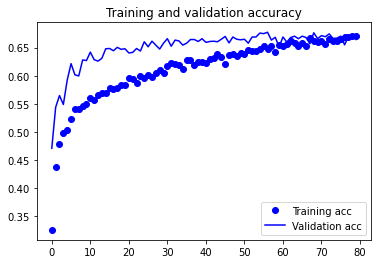

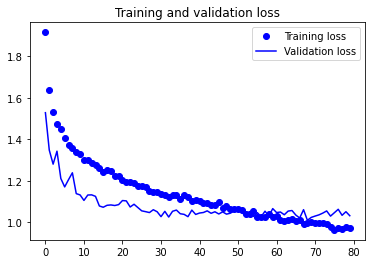

In [19]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = model21_hist.history['acc']
val_acc = model21_hist.history['val_acc']
loss = model21_hist.history['loss']
val_loss = model21_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
# Save the Model
model21.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images<a id="part3"></a>

In [58]:
# Model #1
model15 = keras.models.load_model('food_model_1.h5')

test_loss_1, test_acc_1 = model15.evaluate(test)
print(test_acc_1)

10/10 [==============================] - 8s 704ms/step - loss: 1.0821 - acc: 0.7080
0.7080000042915344


In [59]:
# Model #2
model21 = keras.models.load_model('food_model_2.h5')

test_loss_2, test_acc_2 = model21.evaluate(test)
print(test_acc_2)

10/10 [==============================] - 35s 3s/step - loss: 1.0692 - acc: 0.6720
0.671999990940094


In [60]:
from sklearn.metrics import classification_report

In [62]:
y_pred1 = model15.predict(test)
y_pred1_labels = [np.argmax(i) for i in y_pred1]
y_test1 = test.classes

In [63]:
# Print Classification Report for Model 1
class_labels = list(test.class_indices.keys())
report = classification_report(y_test1, y_pred1_labels, target_names = class_labels)
print(report)

                   precision    recall  f1-score   support

         beignets       0.12      0.10      0.11        50
breakfast_burrito       0.11      0.12      0.11        50
 chocolate_mousse       0.15      0.12      0.13        50
     creme_brulee       0.04      0.04      0.04        50
        dumplings       0.05      0.04      0.04        50
     filet_mignon       0.09      0.10      0.09        50
french_onion_soup       0.07      0.08      0.08        50
           hummus       0.05      0.04      0.04        50
     spring_rolls       0.02      0.02      0.02        50
         takoyaki       0.09      0.14      0.11        50

         accuracy                           0.08       500
        macro avg       0.08      0.08      0.08       500
     weighted avg       0.08      0.08      0.08       500



In [78]:
y_pred2 = model21.predict(test)
y_pred2_labels = [np.argmax(i) for i in y_pred2]
y_test2 = test.classes

In [79]:
# Print Classification Report for Model 2
class_labels = list(test.class_indices.keys())
report = classification_report(y_test2, y_pred2_labels, target_names = class_labels)
print(report)

                   precision    recall  f1-score   support

         beignets       0.10      0.10      0.10        50
breakfast_burrito       0.08      0.08      0.08        50
 chocolate_mousse       0.14      0.16      0.15        50
     creme_brulee       0.09      0.10      0.10        50
        dumplings       0.10      0.08      0.09        50
     filet_mignon       0.15      0.14      0.14        50
french_onion_soup       0.11      0.10      0.10        50
           hummus       0.07      0.10      0.09        50
     spring_rolls       0.05      0.04      0.05        50
         takoyaki       0.10      0.10      0.10        50

         accuracy                           0.10       500
        macro avg       0.10      0.10      0.10       500
     weighted avg       0.10      0.10      0.10       500



In [80]:
# Save the best model
model21.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction<a id="part4"></a>

In [81]:
# Load the model
model_best = keras.models.load_model('food_model_best.h5')

In [82]:
# Load the food list (in alphabetical order)
with open('68.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beignets', 'breakfast_burrito', 'chocolate_mousse', 'creme_brulee', 'dumplings', 'filet_mignon', 'french_onion_soup', 'hummus', 'spring_rolls', 'takoyaki']


In [83]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

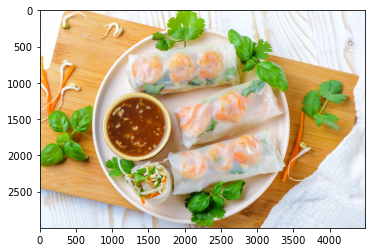

The prediction is:  spring_rolls 

    beignets  breakfast_burrito  chocolate_mousse  creme_brulee  dumplings  \
0  0.000474           0.031324          0.000205      0.000472    0.00114   

   filet_mignon  french_onion_soup   hummus  spring_rolls  takoyaki  
0      0.021461           0.000068  0.00823      0.936274  0.000352  


In [93]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '???.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model_best, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

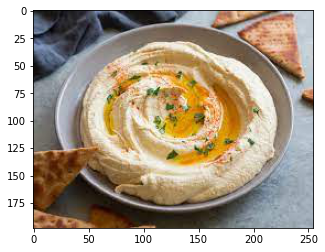

The prediction is:  hummus 

    beignets  breakfast_burrito  chocolate_mousse  creme_brulee  dumplings  \
0  0.000176           0.000944          0.011319      0.000203   0.006226   

   filet_mignon  french_onion_soup    hummus  spring_rolls  takoyaki  
0      0.000025           0.008196  0.971103      0.001759   0.00005  


In [95]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'hummus.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model_best, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

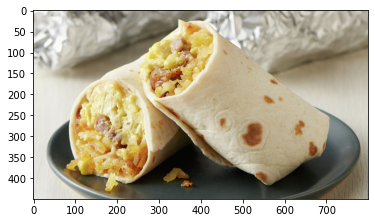

The prediction is:  breakfast_burrito 

    beignets  breakfast_burrito  chocolate_mousse  creme_brulee  dumplings  \
0  0.005879            0.92432          0.006374      0.001677   0.006547   

   filet_mignon  french_onion_soup    hummus  spring_rolls  takoyaki  
0      0.004212           0.004548  0.022119      0.001428  0.022896  


In [99]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'breakfast_burrito.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model_best, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)